1. # Importing Libraries

## I. Data Manipulation Libraries 

In [1]:
import numpy as np
import pandas as pd

## II. Visualization Libraries


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## III. Preprocessing Libraries

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## IV. Model Libraries

In [4]:
# sklearn
import sklearn

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluation
from sklearn.metrics import make_scorer

2. # Loading Data

We don't need sample_submission.csv because it's just a correct format for submitting our predictions to the competition


In [5]:
df_countries=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/countries.csv.zip')
df_age=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv.zip')
df_sessions=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/sessions.csv.zip')
df_test=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/test_users.csv.zip')
df_train = pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip')

3. # Exploratory Data Analysis (EDA)

## I. Data Preview

In [6]:
df_countries.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [7]:
df_age.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [8]:
df_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [9]:
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [10]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## II.Columns Data Types

In [11]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes


In [12]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [13]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

## III.Descriptive Statistics

In [16]:
print("shape of train data :",df_train.shape)
print("shape of test data :",df_test.shape)
print("shape of sessions data :",df_sessions.shape)

shape of train data : (213451, 16)
shape of test data : (62096, 15)
shape of sessions data : (10567737, 6)


In [17]:
df_train['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64


> Notes:
> Something is not right with the values of the age column.
> There seems to be impossible values such as "2014" that might be a handling error or invalid user input.


In [18]:
df_train['age'].value_counts()

age
30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
          ... 
1925.0       1
1935.0       1
1933.0       1
112.0        1
1926.0       1
Name: count, Length: 127, dtype: int64

In [19]:
df_train['signup_flow'].describe()

count    213451.000000
mean          3.267387
std           7.637707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: signup_flow, dtype: float64

In [20]:
df_train['signup_flow'].value_counts()

signup_flow
0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: count, dtype: int64

In [21]:
for col in df_train.select_dtypes("object").columns:
    print("-"*25, f"\n{col} Column\n", "-"*25)
    display(df_train[col].value_counts())

------------------------- 
id Column
 -------------------------


id
gxn3p5htnn    1
umu2ra4v9z    1
by6zlm19yp    1
k185q1twol    1
usvsw2yn8l    1
             ..
i77dzp26ko    1
fn6xhk8iek    1
97ur6gk6sj    1
l9gbnf1qik    1
nw9fwlyb5f    1
Name: count, Length: 213451, dtype: int64

------------------------- 
date_account_created Column
 -------------------------


date_account_created
2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
             ... 
2010-03-09      1
2010-01-28      1
2010-01-31      1
2010-04-11      1
2010-06-18      1
Name: count, Length: 1634, dtype: int64

------------------------- 
date_first_booking Column
 -------------------------


date_first_booking
2014-05-22    248
2014-06-11    231
2014-06-24    226
2014-05-21    225
2014-06-10    223
             ... 
2010-01-31      1
2010-02-09      1
2010-06-10      1
2010-02-04      1
2015-06-28      1
Name: count, Length: 1976, dtype: int64

------------------------- 
gender Column
 -------------------------


gender
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: count, dtype: int64

------------------------- 
signup_method Column
 -------------------------


signup_method
basic       152897
facebook     60008
google         546
Name: count, dtype: int64

------------------------- 
language Column
 -------------------------


language
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: count, dtype: int64

------------------------- 
affiliate_channel Column
 -------------------------


affiliate_channel
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: count, dtype: int64

------------------------- 
affiliate_provider Column
 -------------------------


affiliate_provider
direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: count, dtype: int64

------------------------- 
first_affiliate_tracked Column
 -------------------------


first_affiliate_tracked
untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: count, dtype: int64

------------------------- 
signup_app Column
 -------------------------


signup_app
Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: count, dtype: int64

------------------------- 
first_device_type Column
 -------------------------


first_device_type
Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: count, dtype: int64

------------------------- 
first_browser Column
 -------------------------


first_browser
Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                   

------------------------- 
country_destination Column
 -------------------------


country_destination
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: count, dtype: int64


> Notes:we have unknow values should fill with NAN


In [22]:
df_test['age'].describe()

count    33220.000000
mean        37.616677
std         74.440647
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64

In [23]:
df_test['age'].value_counts()

age
28.0      1748
27.0      1724
26.0      1701
25.0      1690
29.0      1684
          ... 
1945.0       1
2000.0       1
1938.0       1
1939.0       1
108.0        1
Name: count, Length: 124, dtype: int64

In [24]:
df_test['signup_flow'].describe()

count    62096.000000
mean         7.813885
std         11.254291
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max         25.000000
Name: signup_flow, dtype: float64

In [25]:
df_test['signup_flow'].value_counts()

signup_flow
0     41353
25    15175
23     3573
12     1915
8        75
14        4
21        1
Name: count, dtype: int64

In [26]:
for col in df_test.select_dtypes("object").columns:
    print("-"*25, f"\n{col} Column\n", "-"*25)
    display(df_test[col].value_counts())

------------------------- 
id Column
 -------------------------


id
5uwns89zht    1
344bg0yt2x    1
toa6oi63g3    1
cjjfzoi0d6    1
1q8zxusz4w    1
             ..
sjel0mmzbu    1
e3isontepg    1
jrqj6wm91e    1
wrapu2artg    1
9uqfg8txu3    1
Name: count, Length: 62096, dtype: int64

------------------------- 
date_account_created Column
 -------------------------


date_account_created
2014-07-23    1105
2014-07-22    1052
2014-07-17     978
2014-07-24     923
2014-07-18     892
              ... 
2014-07-06     475
2014-07-12     472
2014-07-04     445
2014-07-05     421
2014-07-13     401
Name: count, Length: 92, dtype: int64

------------------------- 
gender Column
 -------------------------


gender
-unknown-    33792
FEMALE       14483
MALE         13769
OTHER           52
Name: count, dtype: int64

------------------------- 
signup_method Column
 -------------------------


signup_method
basic       45325
facebook    14856
google       1892
weibo          23
Name: count, dtype: int64

------------------------- 
language Column
 -------------------------


language
en           59224
zh            1002
ko             369
fr             336
es             259
de             245
ja             120
ru             119
it             119
pt              82
sv              54
nl              37
tr              28
no              21
pl              21
cs              17
da              17
hu               7
el               6
fi               6
th               4
ca               1
-unknown-        1
id               1
Name: count, dtype: int64

------------------------- 
affiliate_channel Column
 -------------------------


affiliate_channel
direct           43844
sem-brand        10394
seo               5699
sem-non-brand     1231
other              586
remarketing        172
content            170
Name: count, dtype: int64

------------------------- 
affiliate_provider Column
 -------------------------


affiliate_provider
direct                 43844
google                 14263
facebook                1723
bing                    1391
other                    487
yahoo                    157
email-marketing          104
padmapper                 68
facebook-open-graph       21
naver                     14
meetup                    11
craigslist                 4
baidu                      3
gsp                        2
daum                       2
vast                       1
yandex                     1
Name: count, dtype: int64

------------------------- 
first_affiliate_tracked Column
 -------------------------


first_affiliate_tracked
untracked        33949
linked           15777
omg              10877
product            797
tracked-other      499
marketing          142
local ops           35
Name: count, dtype: int64

------------------------- 
signup_app Column
 -------------------------


signup_app
Web        37201
iOS        15574
Android     5065
Moweb       4256
Name: count, dtype: int64

------------------------- 
first_device_type Column
 -------------------------


first_device_type
iPhone                19055
Mac Desktop           16728
Windows Desktop       14232
Android Phone          6655
iPad                   3697
Android Tablet          806
Other/Unknown           500
Desktop (Other)         308
SmartPhone (Other)      115
Name: count, dtype: int64

------------------------- 
first_browser Column
 -------------------------


first_browser
-unknown-             17128
Chrome                14826
Mobile Safari         10362
Safari                 8133
Firefox                5010
IE                     3676
Chrome Mobile          1916
Android Browser         726
IE Mobile                82
Silk                     48
Opera                    40
BlackBerry Browser       36
Mobile Firefox           34
Maxthon                  14
Chromium                 10
Sogou Explorer           10
AOL Explorer              9
Apple Mail                9
Iron                      7
Opera Mini                4
SiteKiosk                 3
Yandex.Browser            3
Opera Mobile              2
IBrowse                   1
wOSBrowser                1
Pale Moon                 1
Nintendo Browser          1
SeaMonkey                 1
CometBird                 1
IceWeasel                 1
UC Browser                1
Name: count, dtype: int64

In [27]:
for col in df_sessions.select_dtypes("object").columns:
    print("-"*25, f"\n{col} Column\n", "-"*25)
    display(df_sessions[col].value_counts())

------------------------- 
user_id Column
 -------------------------


user_id
mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
              ... 
28ducycdim       1
g09kkvjc6h       1
n02i24pakw       1
ac2u4y37a4       1
zdb1vza42c       1
Name: count, Length: 135483, dtype: int64

------------------------- 
action Column
 -------------------------


action
show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
                   ...   
deauthorize             1
events                  1
reactivate              1
desks                   1
nyan                    1
Name: count, Length: 359, dtype: int64

------------------------- 
action_type Column
 -------------------------


action_type
view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: count, dtype: int64

------------------------- 
action_detail Column
 -------------------------


action_detail
view_search_results         1776885
p3                          1376550
-unknown-                   1031141
wishlist_content_update      706824
user_profile                 656839
                             ...   
special_offer_field               3
tos_2014                          2
host_refund_guest                 2
host_respond_page                 2
host_standard_suspension          1
Name: count, Length: 155, dtype: int64

------------------------- 
device_type Column
 -------------------------


device_type
Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: count, dtype: int64

## IV.Check Null values

In [28]:
df_train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [29]:
for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:
        print(col,round((df_train[col].isnull().sum() / df_train.shape[0])*100,2))

date_first_booking 58.35
age 41.22
first_affiliate_tracked 2.84


In [30]:
df_test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [31]:
for col in df_test.columns:
    if df_test[col].isnull().sum() > 0:
        print(col,round((df_test[col].isnull().sum() / df_test.shape[0])*100,2))

date_first_booking 100.0
age 46.5
first_affiliate_tracked 0.03


In [32]:
df_sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [33]:
for col in df_sessions.columns:
    if df_sessions[col].isnull().sum() > 0:
        print(col,round((df_sessions[col].isnull().sum() / df_sessions.shape[0])*100,2))

user_id 0.33
action 0.75
action_type 10.66
action_detail 10.66
secs_elapsed 1.29


## V.Check Duplicated Rows

In [34]:
df_train.duplicated().sum()

0

In [35]:
df_test.duplicated().sum()

0

In [36]:
df_sessions.duplicated().sum()

252536

In [37]:
df_sessions[df_sessions.duplicated(keep=False)].head(20)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
420,qtw88d9pbl,show,NaN,NaN,Mac Desktop,180.0
430,qtw88d9pbl,show,NaN,NaN,Mac Desktop,180.0
520,qtw88d9pbl,show,NaN,NaN,Mac Desktop,94.0
522,qtw88d9pbl,show,view,p3,Mac Desktop,2333.0
585,qtw88d9pbl,similar_listings,data,similar_listings,Mac Desktop,193.0
587,qtw88d9pbl,show,NaN,NaN,Mac Desktop,149.0
605,qtw88d9pbl,show,NaN,NaN,Mac Desktop,149.0
645,qtw88d9pbl,similar_listings,data,similar_listings,Mac Desktop,193.0
659,qtw88d9pbl,show,NaN,NaN,Mac Desktop,94.0
689,qtw88d9pbl,lookup,NaN,NaN,Mac Desktop,58.0



> Notes:It seems we have more than a few duplicates in the sessions dataset.We should drop these duplicate rows since they are redundant.


4. # Data Preprocessing

In [38]:
user_data=df_train

## I.Dropping Duplicate Rows

In [39]:
print("The number of duplicated rows at df_sessions is : ",df_sessions.duplicated().sum())
print("The number of records before dropping duplicates is : ",df_sessions.shape[0])
df_sessions.drop_duplicates(inplace=True)
print("The number of records after dropping duplicates is : ",df_sessions.shape[0])

The number of duplicated rows at df_sessions is :  252536
The number of records before dropping duplicates is :  10567737
The number of records after dropping duplicates is :  10315201


## II.Handling -unknown- Values

In [40]:
# Function to  handle unknown values in the datasets 
def handle_unknown(df):
    print(f"Operation affected {df.loc[df[df['gender'] == '-unknown-'].index].shape[0]:,} records in the gender column.")
    df.loc[df[df['gender'] == '-unknown-'].index, 'gender'] = np.nan
    display(df['gender'].value_counts(dropna=False))
    
    print(f"\nOperation affected {df.loc[df[df['first_browser'] == '-unknown-'].index].shape[0]:,} records in the first_browser column.")
    df.loc[df[df['first_browser'] == '-unknown-'].index, 'first_browser'] = np.nan
    display(df['first_browser'].value_counts(dropna=False))

In [41]:
handle_unknown(df_train)

Operation affected 95,688 records in the gender column.


gender
NaN       95688
FEMALE    63041
MALE      54440
OTHER       282
Name: count, dtype: int64


Operation affected 27,266 records in the first_browser column.


first_browser
Chrome                  63845
Safari                  45169
Firefox                 33655
NaN                     27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                   

## III.Handling Columns Data Types

In [42]:
df_train['date_account_created'] = pd.to_datetime(df_train['date_account_created'])
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'])
df_train['timestamp_first_active'] = pd.to_datetime(df_train['timestamp_first_active'])

## IV.Handling Outlier Values

In [43]:
import numpy as np

def calc_age_from_bdate(df, LB=1900, UB=2000):
    """
    Calculate the age by subtracting the presumed birth year from the account creation year.
    Parameters:
        df (pd.DataFrame): DataFrame containing the 'age' and 'date_account_created' columns.
        LB (int): Lower bound for birth year values to consider valid.
        UB (int): Upper bound for birth year values to consider valid.
    """
    # Identify indices where age values represent a plausible birth year
    bdate_index = df[(df['age'] > LB) & (df['age'] < UB)].index
    
    # Log the number of affected records
    print(f"Operation affected {len(bdate_index):,} records.")
    
    # Recalculate age using the account creation date
    df.loc[bdate_index, 'age'] = (
        df.loc[bdate_index, 'date_account_created'].dt.year - df.loc[bdate_index, 'age']
    )

def drop_age_outliers(df, LB=18, UB=120):
    """
    Drop records containing age values outside the interval [LB, UB].
    Parameters:
        df (pd.DataFrame): DataFrame containing the 'age' column.
        LB (int): Minimum valid age.
        UB (int): Maximum valid age.
    """
    # Identify ages greater than the upper bound
    upper_outliers = df[df['age'] > UB].index
    print(f"Upperbound operation affected {len(upper_outliers):,} records.")

    # Identify ages less than the lower bound
    lower_outliers = df[df['age'] < LB].index
    print(f"Lowerbound operation affected {len(lower_outliers):,} records.")

    # Drop the outliers
    df.drop(index=upper_outliers, inplace=True)
    df.drop(index=lower_outliers, inplace=True)

    return df


In [44]:
calc_age_from_bdate(df_train)

Operation affected 29 records.


In [45]:
drop_age_outliers(df_train)


Upperbound operation affected 752 records.
Lowerbound operation affected 158 records.


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,1970-01-01 05:35:40.630235636,NaT,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,1970-01-01 05:35:40.630235719,NaT,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,1970-01-01 05:35:40.630235754,NaT,NaN,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,1970-01-01 05:35:40.630235822,NaT,NaN,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


## V.Handling Null Values

In [46]:
df_train['age'].isnull().sum()

87990

<ipython-input-47-a9b24a4f9f5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_train['age']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


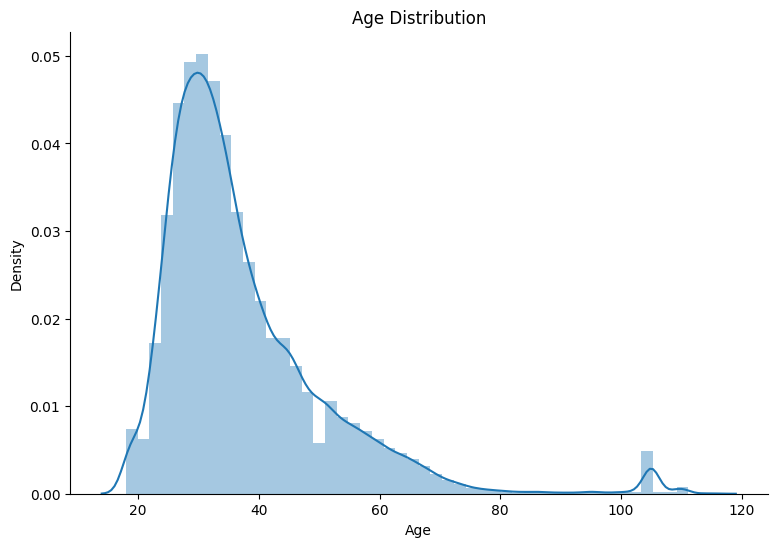

In [47]:
plt.figure(figsize=(9,6))
sns.distplot(x=df_train['age']);
plt.xlabel('Age')
plt.title('Age Distribution')
sns.despine()


<Axes: ylabel='age'>

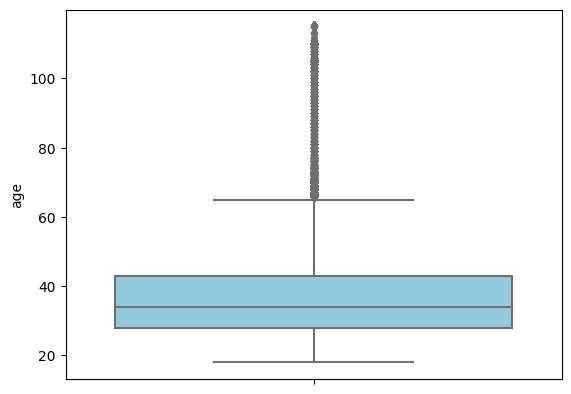

In [48]:
sns.boxplot(y=df_train['age'], color='skyblue')

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212541 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       212541 non-null  object        
 1   date_account_created     212541 non-null  datetime64[ns]
 2   timestamp_first_active   212541 non-null  datetime64[ns]
 3   date_first_booking       88526 non-null   datetime64[ns]
 4   gender                   116935 non-null  object        
 5   age                      124551 non-null  float64       
 6   signup_method            212541 non-null  object        
 7   signup_flow              212541 non-null  int64         
 8   language                 212541 non-null  object        
 9   affiliate_channel        212541 non-null  object        
 10  affiliate_provider       212541 non-null  object        
 11  first_affiliate_tracked  206532 non-null  object        
 12  signup_app           


> Note:we have a lot of values wit NDF at Country_distantion around 52% or more so this makes data imbalanced so instead of taking part of it at training to make balancing at data .Now we have alot of null values at ageso we will drop null values at age that have NDf


In [50]:
df_train = df_train.drop(df_train[(df_train['age'].isnull()) & (df_train['country_destination'] == 'NDF')].index)

In [51]:
df_train.age.isnull().sum()

20376

<ipython-input-52-a9b24a4f9f5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_train['age']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


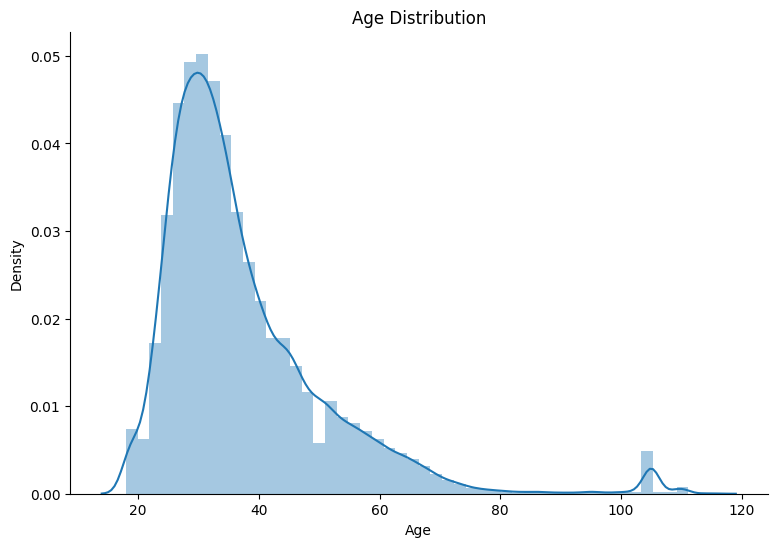

In [52]:
plt.figure(figsize=(9,6))
sns.distplot(x=df_train['age']);
plt.xlabel('Age')
plt.title('Age Distribution')
sns.despine()

In [53]:
df_train['country_destination'].value_counts()

country_destination
US       62117
NDF      56401
other    10049
FR        5003
IT        2820
GB        2312
ES        2239
CA        1422
DE        1053
NL         757
AU         538
PT         216
Name: count, dtype: int64

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144927 entries, 1 to 213448
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       144927 non-null  object        
 1   date_account_created     144927 non-null  datetime64[ns]
 2   timestamp_first_active   144927 non-null  datetime64[ns]
 3   date_first_booking       88526 non-null   datetime64[ns]
 4   gender                   111186 non-null  object        
 5   age                      124551 non-null  float64       
 6   signup_method            144927 non-null  object        
 7   signup_flow              144927 non-null  int64         
 8   language                 144927 non-null  object        
 9   affiliate_channel        144927 non-null  object        
 10  affiliate_provider       144927 non-null  object        
 11  first_affiliate_tracked  141574 non-null  object        
 12  signup_app           

In [55]:
from sklearn.impute import KNNImputer
import pandas as pd

# Apply KNN Imputation without One-Hot Encoding
def knn_impute_without_onehot(df, numeric_cols, n_neighbors=5):
    """
    Impute missing values using KNN for numeric columns.
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        numeric_cols (list): List of numeric column names to impute.
        n_neighbors (int): Number of neighbors for KNN Imputer.
    Returns:
        pd.DataFrame: DataFrame with imputed values.
    """
    # Apply KNN imputation to numeric columns only
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_numeric_data = knn_imputer.fit_transform(df[numeric_cols])

    # Replace the imputed numeric values back into the original DataFrame
    for idx, col in enumerate(numeric_cols):
        df[col] = imputed_numeric_data[:, idx]

    return df

In [56]:
numeric_cols = ['age']
df_train = knn_impute_without_onehot(df_train, numeric_cols)


<ipython-input-57-a9b24a4f9f5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_train['age']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


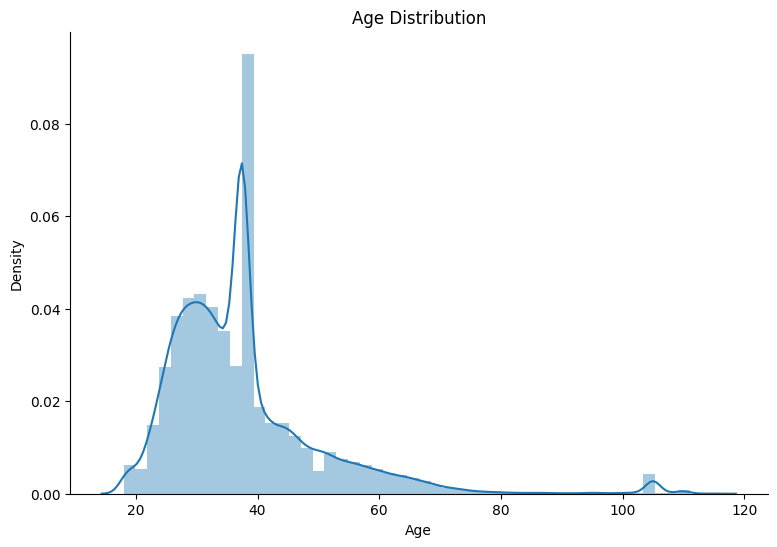

In [57]:
plt.figure(figsize=(9,6))
sns.distplot(x=df_train['age']);
plt.xlabel('Age')
plt.title('Age Distribution')
sns.despine()

In [58]:
# Round the 'age' column to the nearest integer
df_train['age'] = df_train['age'].round()
# Convert the 'age' column to an integer type
df_train['age'] = df_train['age'].astype(int)

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144927 entries, 1 to 213448
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       144927 non-null  object        
 1   date_account_created     144927 non-null  datetime64[ns]
 2   timestamp_first_active   144927 non-null  datetime64[ns]
 3   date_first_booking       88526 non-null   datetime64[ns]
 4   gender                   111186 non-null  object        
 5   age                      144927 non-null  int64         
 6   signup_method            144927 non-null  object        
 7   signup_flow              144927 non-null  int64         
 8   language                 144927 non-null  object        
 9   affiliate_channel        144927 non-null  object        
 10  affiliate_provider       144927 non-null  object        
 11  first_affiliate_tracked  141574 non-null  object        
 12  signup_app           

In [60]:
df_train['first_affiliate_tracked'].isnull().sum()

3353

In [61]:
df_train['first_affiliate_tracked'].value_counts()

first_affiliate_tracked
untracked        74949
linked           32545
omg              28724
tracked-other     4264
product            961
marketing          103
local ops           28
Name: count, dtype: int64

In [62]:
# First Affiliate Tracked Column (Imputing with 'untracked')
# Since it makes since from the business point of view
df_train.first_affiliate_tracked.fillna("untracked", inplace=True)

In [63]:
df_train['first_affiliate_tracked'].value_counts()

first_affiliate_tracked
untracked        78302
linked           32545
omg              28724
tracked-other     4264
product            961
marketing          103
local ops           28
Name: count, dtype: int64

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144927 entries, 1 to 213448
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       144927 non-null  object        
 1   date_account_created     144927 non-null  datetime64[ns]
 2   timestamp_first_active   144927 non-null  datetime64[ns]
 3   date_first_booking       88526 non-null   datetime64[ns]
 4   gender                   111186 non-null  object        
 5   age                      144927 non-null  int64         
 6   signup_method            144927 non-null  object        
 7   signup_flow              144927 non-null  int64         
 8   language                 144927 non-null  object        
 9   affiliate_channel        144927 non-null  object        
 10  affiliate_provider       144927 non-null  object        
 11  first_affiliate_tracked  144927 non-null  object        
 12  signup_app           

## VI.Splitting Dates to Year, Month, Day Columns

In [65]:
def split_dates(df, drop_original=False, verbose=True):
    """Splits any column with dtype of datetime64[ns] into 3 columns namely _year, _month, _day.
        Keeps the original column if drop_original is not True"""
    date_cols = df.select_dtypes('datetime64[ns]').columns
    if len(date_cols) == 0:
        print("No columns with dtype of datetime[ns]!")
        return None
    for date_col in date_cols:
        if verbose:
            print(f"Splitting {date_col} Column...")
        df[date_col+'_year'] = df[date_col].dt.year
        df[date_col+'_month'] = df[date_col].dt.month
        df[date_col+'_day'] = df[date_col].dt.day
    if drop_original:
        df.drop(date_cols, axis=1, inplace=True)

In [66]:
split_dates(df_train)

Splitting date_account_created Column...
Splitting timestamp_first_active Column...
Splitting date_first_booking Column...


In [67]:
df_train=df_train.drop('date_account_created',axis=1)
df_train=df_train.drop('timestamp_first_active',axis=1)
df_train=df_train.drop('date_first_booking',axis=1)

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144927 entries, 1 to 213448
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            144927 non-null  object 
 1   gender                        111186 non-null  object 
 2   age                           144927 non-null  int64  
 3   signup_method                 144927 non-null  object 
 4   signup_flow                   144927 non-null  int64  
 5   language                      144927 non-null  object 
 6   affiliate_channel             144927 non-null  object 
 7   affiliate_provider            144927 non-null  object 
 8   first_affiliate_tracked       144927 non-null  object 
 9   signup_app                    144927 non-null  object 
 10  first_device_type             144927 non-null  object 
 11  first_browser                 130356 non-null  object 
 12  country_destination           144927 non-null  ob

## VII.Grouping Minor Browsers in first_browser Column

In [69]:
df_train.first_browser.value_counts()

first_browser
Chrome                  47416
Safari                  32055
Firefox                 24156
IE                      12825
Mobile Safari           12057
Chrome Mobile             694
Android Browser           487
Opera                     123
AOL Explorer              121
Silk                       87
Chromium                   57
BlackBerry Browser         40
Maxthon                    34
Apple Mail                 25
RockMelt                   22
Mobile Firefox             21
IE Mobile                  15
Sogou Explorer             15
SiteKiosk                  14
Iron                       13
IceWeasel                  12
Yandex.Browser              9
Camino                      8
Pale Moon                   7
TenFourFox                  6
wOSBrowser                  5
SeaMonkey                   4
Avant Browser               4
CoolNovo                    4
Opera Mini                  3
TheWorld Browser            2
Mozilla                     2
SlimBrowser               

In [70]:
def group_browsers(df, verbose=True):
    """Replaces browser names with their respective category based on predefined categories."""
    browser_categories = {
        'Mobile Browsers': [
            'Mobile Safari', 'Chrome Mobile', 'Android Browser', 'Opera Mini', 'BlackBerry Browser', 
            'Mobile Firefox', 'IE Mobile', 'Opera Mobile', 'Kindle Browser', 'Palm Pre web browser', 
            'PS Vita browser', 'wOSBrowser'
        ],
        'Desktop Browsers': [
            'Chrome', 'Safari', 'Firefox', 'IE', 'Opera', 'Chromium', 'Maxthon', 'RockMelt', 'Yandex.Browser', 
            'Camino', 'Pale Moon', 'TenFourFox', 'SeaMonkey', 'Avant Browser', 'CoolNovo', 'TheWorld Browser', 
            'Mozilla', 'SlimBrowser', 'CometBird', 'Stainless', 'Comodo Dragon', 'Iron', 'IceWeasel', 'Sogou Explorer', 
            'SiteKiosk','AOL Explorer', 'Silk'
        ],
        'Email Clients': [
            'Apple Mail', 'NetNewsWire'
        ],
        'Bots and Crawlers': [
            'Googlebot'
        ]
    }

    for category, browsers in browser_categories.items():
        df.first_browser.replace(to_replace=browsers, value=category, inplace=True)

    if verbose:
        print("Browsers categorized into: ", list(browser_categories.keys()))

In [71]:
group_browsers(df_train)

Browsers categorized into:  ['Mobile Browsers', 'Desktop Browsers', 'Email Clients', 'Bots and Crawlers']


In [72]:
df_train.first_browser.value_counts()

first_browser
Desktop Browsers     117002
Mobile Browsers       13327
Email Clients            26
Bots and Crawlers         1
Name: count, dtype: int64

## vIII.Grouping session Dataset by user_id 

In [73]:
# Define aggregation methods, adding a count for the number of actions
enlist = lambda x: x.to_list()
agg_methods = {
    'secs_elapsed': 'sum', 
    'action': enlist, 
    'action_type': enlist, 
    'action_detail': enlist, 
    'device_type': enlist
}

# Add a new column 'action_count' to count the number of actions per user
grouped_sessions = df_sessions.groupby('user_id').agg({
    **agg_methods, 
    'action': 'count'  # Count the number of actions
}).rename(columns={'action': 'action_count'})

# Re-aggregate 'action' as a list after counting
grouped_sessions['action'] = df_sessions.groupby('user_id')['action'].apply(enlist)

# Display the result
grouped_sessions.head()


,secs_elapsed,action_count,action_type,action_detail,device_type,action
user_id,,,,,,
00023iyk9l,867896.0,39,"[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[index, dashboard, header_userpic, dashboard, ..."
0010k6l0om,586366.0,62,"[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[search_results, show, personalize, show, sear..."
001wyh0pz8,281528.0,89,"[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[search, search, search, show, social_connecti..."
0028jgx1x1,297010.0,31,"[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[show, reviews, show, search, show, search, re..."
002qnbzfs5,6483622.0,734,"[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[social_connections, payment_methods, create, ..."


In [74]:
# Selecting only the required columns from grouped_sessions
grouped_sessions_subset = grouped_sessions[['secs_elapsed', 'action_count']]

# Performing the left join
merged_train = pd.merge(df_train, grouped_sessions_subset, left_on='id', right_index=True, how='left')

# Display the resulting dataset
merged_train.head()


,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,date_account_created_month,date_account_created_day,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,date_first_booking_year,date_first_booking_month,date_first_booking_day,secs_elapsed,action_count
1,820tgsjxq7,MALE,38,facebook,0,en,seo,google,untracked,Web,...,5,25,1970,1,1,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,FEMALE,56,basic,3,en,direct,direct,untracked,Web,...,9,28,1970,1,1,2010.0,8.0,2.0,NaN,NaN
3,bjjt8pjhuk,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,...,12,5,1970,1,1,2012.0,9.0,8.0,NaN,NaN
4,87mebub9p4,NaN,41,basic,0,en,direct,direct,untracked,Web,...,9,14,1970,1,1,2010.0,2.0,18.0,NaN,NaN
5,osr2jwljor,NaN,37,basic,0,en,other,other,omg,Web,...,1,1,1970,1,1,2010.0,1.0,2.0,NaN,NaN


In [75]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144927 entries, 1 to 213448
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            144927 non-null  object 
 1   gender                        111186 non-null  object 
 2   age                           144927 non-null  int64  
 3   signup_method                 144927 non-null  object 
 4   signup_flow                   144927 non-null  int64  
 5   language                      144927 non-null  object 
 6   affiliate_channel             144927 non-null  object 
 7   affiliate_provider            144927 non-null  object 
 8   first_affiliate_tracked       144927 non-null  object 
 9   signup_app                    144927 non-null  object 
 10  first_device_type             144927 non-null  object 
 11  first_browser                 130356 non-null  object 
 12  country_destination           144927 non-null  ob

<ipython-input-76-00a7ce570e86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=merged_train['secs_elapsed']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


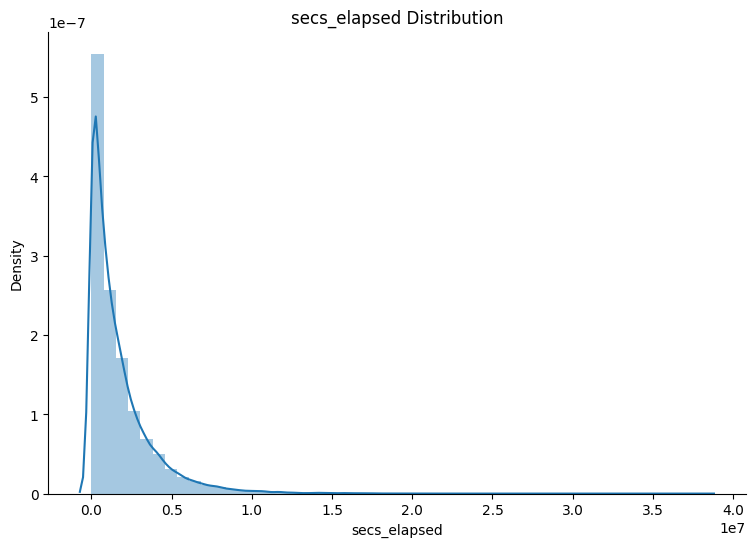

In [76]:
plt.figure(figsize=(9,6))
sns.distplot(x=merged_train['secs_elapsed']);
plt.xlabel('secs_elapsed')
plt.title('secs_elapsed Distribution')
sns.despine()

In [77]:
merged_train.head()


,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,date_account_created_month,date_account_created_day,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,date_first_booking_year,date_first_booking_month,date_first_booking_day,secs_elapsed,action_count
1,820tgsjxq7,MALE,38,facebook,0,en,seo,google,untracked,Web,...,5,25,1970,1,1,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,FEMALE,56,basic,3,en,direct,direct,untracked,Web,...,9,28,1970,1,1,2010.0,8.0,2.0,NaN,NaN
3,bjjt8pjhuk,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,...,12,5,1970,1,1,2012.0,9.0,8.0,NaN,NaN
4,87mebub9p4,NaN,41,basic,0,en,direct,direct,untracked,Web,...,9,14,1970,1,1,2010.0,2.0,18.0,NaN,NaN
5,osr2jwljor,NaN,37,basic,0,en,other,other,omg,Web,...,1,1,1970,1,1,2010.0,1.0,2.0,NaN,NaN


In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Encoding categorical features using OneHotEncoder
categorical_features = ['signup_method', 'language', 'affiliate_channel', 
                        'first_device_type', 'first_affiliate_tracked', 'affiliate_provider']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform categorical features, filling missing values with 'missing'
categorical_encoded = onehot_encoder.fit_transform(merged_train[categorical_features].fillna('missing'))

# Prepare numeric features
numeric_features = ['age', 'signup_flow']
numeric_data = merged_train[numeric_features].values

# Combine numeric and encoded categorical features
X = np.hstack([numeric_data, categorical_encoded])

# Check if country_destination is 'NDF', if so fill 'secs_elapsed' and 'action_count' with 0
merged_train.loc[merged_train['country_destination'] == 'NDF', ['secs_elapsed', 'action_count']] = 0

# Identify rows with missing 'secs_elapsed' and 'action_count'
filled_rows = merged_train[merged_train['secs_elapsed'].notna() & merged_train['action_count'].notna()].index
missing_rows = merged_train[merged_train['secs_elapsed'].isna() | merged_train['action_count'].isna()].index

# Create boolean masks to select rows in X
filled_mask = merged_train['secs_elapsed'].notna() & merged_train['action_count'].notna()
missing_mask = merged_train['secs_elapsed'].isna() | merged_train['action_count'].isna()

# Use boolean masks to index X
X_filled = X[filled_mask.values]
X_missing = X[missing_mask.values]

# Train KNN models for secs_elapsed and action_count
knn_secs = KNeighborsRegressor(n_neighbors=5)
knn_action = KNeighborsRegressor(n_neighbors=5)

knn_secs.fit(X_filled, merged_train.loc[filled_mask, 'secs_elapsed'].values)
knn_action.fit(X_filled, merged_train.loc[filled_mask, 'action_count'].values)

# Predict missing values
predicted_secs = knn_secs.predict(X_missing)
predicted_action = knn_action.predict(X_missing)

# Fill missing values in the DataFrame
merged_train.loc[missing_mask, 'secs_elapsed'] = predicted_secs
merged_train.loc[missing_mask, 'action_count'] = predicted_action


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144927 entries, 1 to 213448
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            144927 non-null  object 
 1   gender                        111186 non-null  object 
 2   age                           144927 non-null  int64  
 3   signup_method                 144927 non-null  object 
 4   signup_flow                   144927 non-null  int64  
 5   language                      144927 non-null  object 
 6   affiliate_channel             144927 non-null  object 
 7   affiliate_provider            144927 non-null  object 
 8   first_affiliate_tracked       144927 non-null  object 
 9   signup_app                    144927 non-null  object 
 10  first_device_type             144927 non-null  object 
 11  first_browser                 130356 non-null  object 
 12  country_destination           144927 non-null  ob

<ipython-input-80-00a7ce570e86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=merged_train['secs_elapsed']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


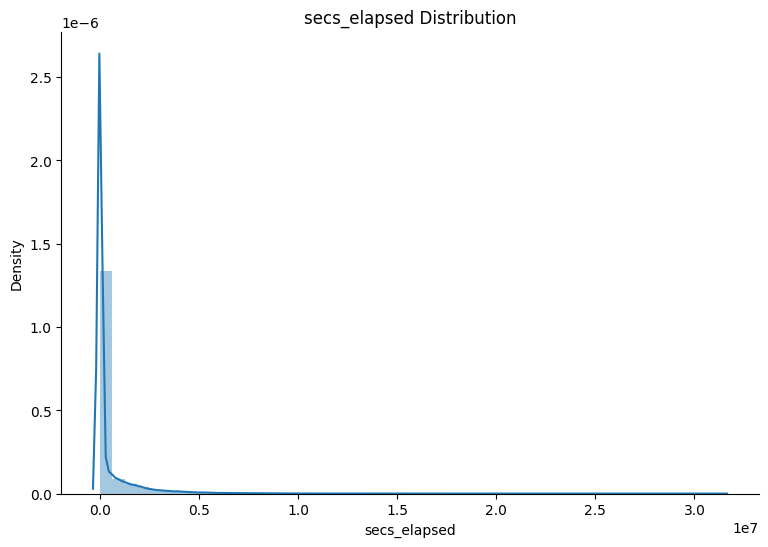

In [80]:
plt.figure(figsize=(9,6))
sns.distplot(x=merged_train['secs_elapsed']);
plt.xlabel('secs_elapsed')
plt.title('secs_elapsed Distribution')
sns.despine()

## IX.Test Data Preparation

In [81]:
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [83]:
df_test=df_test.drop('date_first_booking',axis=1)

In [84]:
df_test['date_account_created'] = pd.to_datetime(df_test['date_account_created'])
df_test['timestamp_first_active'] = pd.to_datetime(df_test['timestamp_first_active'])

In [85]:
# Handling -unknown- values
handle_unknown(df_test)

Operation affected 33,792 records in the gender column.


gender
NaN       33792
FEMALE    14483
MALE      13769
OTHER        52
Name: count, dtype: int64


Operation affected 17,128 records in the first_browser column.


first_browser
NaN                   17128
Chrome                14826
Mobile Safari         10362
Safari                 8133
Firefox                5010
IE                     3676
Chrome Mobile          1916
Android Browser         726
IE Mobile                82
Silk                     48
Opera                    40
BlackBerry Browser       36
Mobile Firefox           34
Maxthon                  14
Chromium                 10
Sogou Explorer           10
AOL Explorer              9
Apple Mail                9
Iron                      7
Opera Mini                4
SiteKiosk                 3
Yandex.Browser            3
Opera Mobile              2
IBrowse                   1
wOSBrowser                1
Pale Moon                 1
Nintendo Browser          1
SeaMonkey                 1
CometBird                 1
IceWeasel                 1
UC Browser                1
Name: count, dtype: int64

In [86]:
df_test.age.value_counts()

age
28.0      1748
27.0      1724
26.0      1701
25.0      1690
29.0      1684
          ... 
1945.0       1
2000.0       1
1938.0       1
1939.0       1
108.0        1
Name: count, Length: 124, dtype: int64

In [87]:
calc_age_from_bdate(df_test)
drop_age_outliers(df_test)

Operation affected 42 records.
Upperbound operation affected 7 records.
Lowerbound operation affected 30 records.


,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,1970-01-01 05:35:40.701000006,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,1970-01-01 05:35:40.701000051,NaN,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,1970-01-01 05:35:40.701000148,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,1970-01-01 05:35:40.701000215,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,1970-01-01 05:35:40.701000305,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,1970-01-01 05:35:40.930235232,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,1970-01-01 05:35:40.930235306,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,NaN
62093,fa6260ziny,2014-09-30,1970-01-01 05:35:40.930235408,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,1970-01-01 05:35:40.930235430,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


<ipython-input-88-e9195d35ce66>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_test['age']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


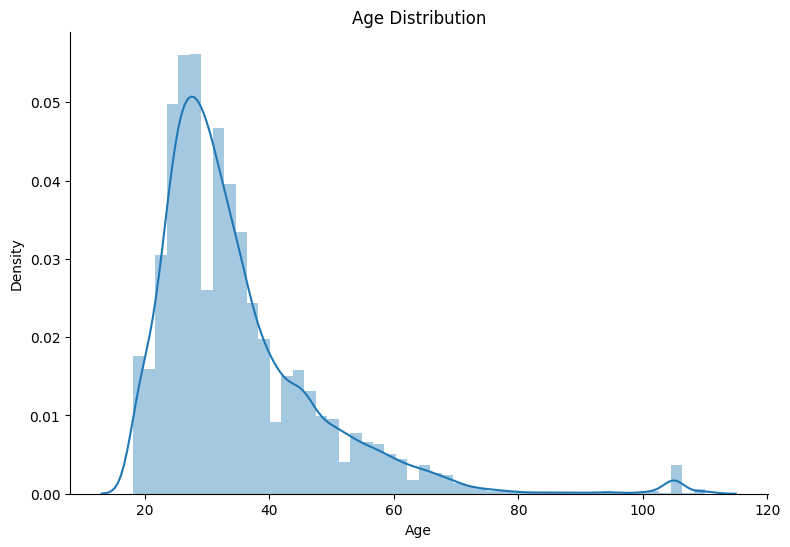

In [88]:
plt.figure(figsize=(9,6))
sns.distplot(x=df_test['age']);
plt.xlabel('Age')
plt.title('Age Distribution')
sns.despine()

In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62059 entries, 0 to 62095
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       62059 non-null  object        
 1   date_account_created     62059 non-null  datetime64[ns]
 2   timestamp_first_active   62059 non-null  datetime64[ns]
 3   gender                   28268 non-null  object        
 4   age                      33183 non-null  float64       
 5   signup_method            62059 non-null  object        
 6   signup_flow              62059 non-null  int64         
 7   language                 62059 non-null  object        
 8   affiliate_channel        62059 non-null  object        
 9   affiliate_provider       62059 non-null  object        
 10  first_affiliate_tracked  62039 non-null  object        
 11  signup_app               62059 non-null  object        
 12  first_device_type        62059 non-nu

In [90]:
numeric_cols = ['age']
df_test = knn_impute_without_onehot(df_test, numeric_cols)


<ipython-input-91-e9195d35ce66>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_test['age']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


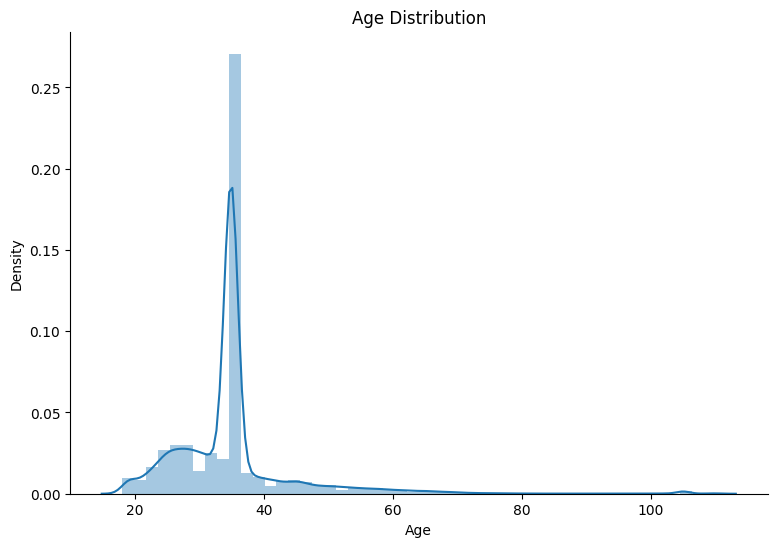

In [91]:
plt.figure(figsize=(9,6))
sns.distplot(x=df_test['age']);
plt.xlabel('Age')
plt.title('Age Distribution')
sns.despine()

In [92]:
# Round the 'age' column to the nearest integer
df_test['age'] = df_test['age'].round()

# Convert the 'age' column to an integer type
df_test['age'] = df_test['age'].astype(int)

In [93]:
split_dates(df_test)

Splitting date_account_created Column...
Splitting timestamp_first_active Column...


In [94]:
df_test=df_test.drop('date_account_created',axis=1)
df_test=df_test.drop('timestamp_first_active',axis=1)

In [95]:
group_browsers(df_test)

Browsers categorized into:  ['Mobile Browsers', 'Desktop Browsers', 'Email Clients', 'Bots and Crawlers']


In [96]:
# Selecting only the required columns from grouped_sessions
grouped_sessions_subset = grouped_sessions[['secs_elapsed', 'action_count']]

# Performing the left join
merged_test = pd.merge(df_test, grouped_sessions_subset, left_on='id', right_index=True, how='left')

# Display the resulting dataset
merged_test.head()


,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_year,date_account_created_month,date_account_created_day,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,secs_elapsed,action_count
0,5uwns89zht,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Browsers,2014,7,1,1970,1,1,119187.0,8.0
1,jtl0dijy2j,NaN,35,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Browsers,2014,7,1,1970,1,1,250119.0,19.0
2,xx0ulgorjt,NaN,35,basic,0,en,direct,direct,linked,Web,Windows Desktop,Desktop Browsers,2014,7,1,1970,1,1,974807.0,57.0
3,6c6puo6ix0,NaN,35,basic,0,en,direct,direct,linked,Web,Windows Desktop,Desktop Browsers,2014,7,1,1970,1,1,123001.0,11.0
4,czqhjk3yfe,NaN,35,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Desktop Browsers,2014,7,1,1970,1,1,454023.0,18.0


In [97]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62059 entries, 0 to 62095
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            62059 non-null  object 
 1   gender                        28268 non-null  object 
 2   age                           62059 non-null  int64  
 3   signup_method                 62059 non-null  object 
 4   signup_flow                   62059 non-null  int64  
 5   language                      62059 non-null  object 
 6   affiliate_channel             62059 non-null  object 
 7   affiliate_provider            62059 non-null  object 
 8   first_affiliate_tracked       62039 non-null  object 
 9   signup_app                    62059 non-null  object 
 10  first_device_type             62059 non-null  object 
 11  first_browser                 44956 non-null  object 
 12  date_account_created_year     62059 non-null  int32  
 13  date_a

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Encoding categorical features using OneHotEncoder
categorical_features = ['signup_method', 'language', 'affiliate_channel', 
                        'first_device_type', 'first_affiliate_tracked', 'affiliate_provider']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform categorical features, filling missing values with 'missing'
categorical_encoded = onehot_encoder.fit_transform(merged_test[categorical_features].fillna('missing'))

# Prepare numeric features
numeric_features = ['age', 'signup_flow']
numeric_data = merged_test[numeric_features].values

# Combine numeric and encoded categorical features
X = np.hstack([numeric_data, categorical_encoded])

# Identify rows with missing values in 'secs_elapsed' and 'action_count'
filled_rows = merged_test[merged_test['secs_elapsed'].notna() & merged_test['action_count'].notna()].index
missing_rows = merged_test[merged_test['secs_elapsed'].isna() | merged_test['action_count'].isna()].index

# Create boolean masks to select rows in X
filled_mask = merged_test['secs_elapsed'].notna() & merged_test['action_count'].notna()
missing_mask = merged_test['secs_elapsed'].isna() | merged_test['action_count'].isna()

# Use boolean masks to index X
X_filled = X[filled_mask.values]
X_missing = X[missing_mask.values]

#Train KNN models for secs_elapsed and action_count
knn_secs = KNeighborsRegressor(n_neighbors=5)
knn_action = KNeighborsRegressor(n_neighbors=5)

knn_secs.fit(X_filled, merged_test.loc[filled_mask, 'secs_elapsed'].values)
knn_action.fit(X_filled, merged_test.loc[filled_mask, 'action_count'].values)

# Predict missing values
predicted_secs = knn_secs.predict(X_missing)
predicted_action = knn_action.predict(X_missing)

# Fill missing values in the DataFrame
merged_test.loc[missing_mask, 'secs_elapsed'] = predicted_secs
merged_test.loc[missing_mask, 'action_count'] = predicted_action


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## X.Encoding Categorical Features

In [99]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62059 entries, 0 to 62095
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            62059 non-null  object 
 1   gender                        28268 non-null  object 
 2   age                           62059 non-null  int64  
 3   signup_method                 62059 non-null  object 
 4   signup_flow                   62059 non-null  int64  
 5   language                      62059 non-null  object 
 6   affiliate_channel             62059 non-null  object 
 7   affiliate_provider            62059 non-null  object 
 8   first_affiliate_tracked       62039 non-null  object 
 9   signup_app                    62059 non-null  object 
 10  first_device_type             62059 non-null  object 
 11  first_browser                 44956 non-null  object 
 12  date_account_created_year     62059 non-null  int32  
 13  date_a

In [100]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144927 entries, 1 to 213448
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            144927 non-null  object 
 1   gender                        111186 non-null  object 
 2   age                           144927 non-null  int64  
 3   signup_method                 144927 non-null  object 
 4   signup_flow                   144927 non-null  int64  
 5   language                      144927 non-null  object 
 6   affiliate_channel             144927 non-null  object 
 7   affiliate_provider            144927 non-null  object 
 8   first_affiliate_tracked       144927 non-null  object 
 9   signup_app                    144927 non-null  object 
 10  first_device_type             144927 non-null  object 
 11  first_browser                 130356 non-null  object 
 12  country_destination           144927 non-null  ob

In [101]:
drop_first_book=['date_first_booking_year', 'date_first_booking_month', 'date_first_booking_day']
merged_train.drop(drop_first_book, axis=1, inplace=True)

In [102]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define the categorical columns
cat_cols = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 
            'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

# Step 1: Create y_train from merged_train and encode it
y_train = merged_train['country_destination']  # Extract the target column
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Encode the target column

# Step 2: Drop the columns
x_train = merged_train.drop(columns=['id','country_destination'])
x_test = merged_test.drop(columns=['id'])


# Step 3: Apply one-hot encoding to x_train and merged_test
x_train = pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=cat_cols, drop_first=True)


In [103]:
x_test.shape

(62059, 82)

In [104]:
x_train.shape

(144927, 82)

# Data Visualization

## I.Univariate Analysis

<ipython-input-105-dd845ee9da72>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=user_data['age']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


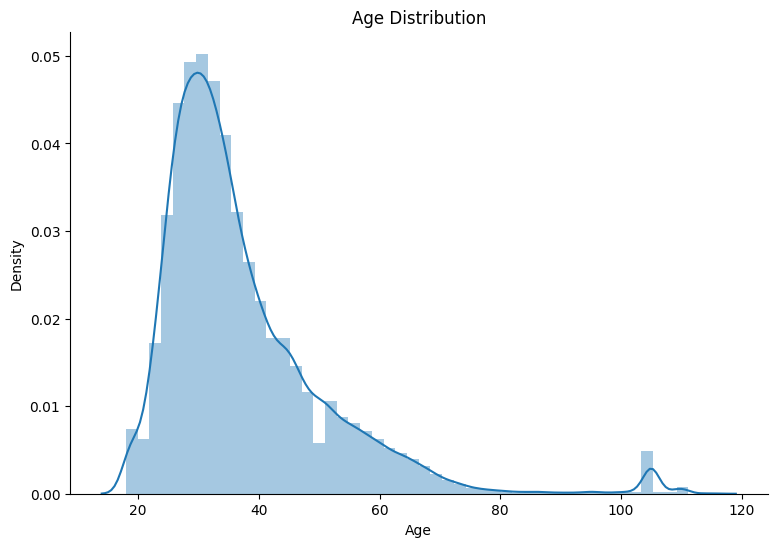

In [105]:
plt.figure(figsize=(9,6))
sns.distplot(x=user_data['age']);
plt.xlabel('Age')
plt.title('Age Distribution')
sns.despine()


> Notes:The distribution of the age column is skewed to the right


<ipython-input-106-c2d229de6037>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=user_data['signup_flow']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


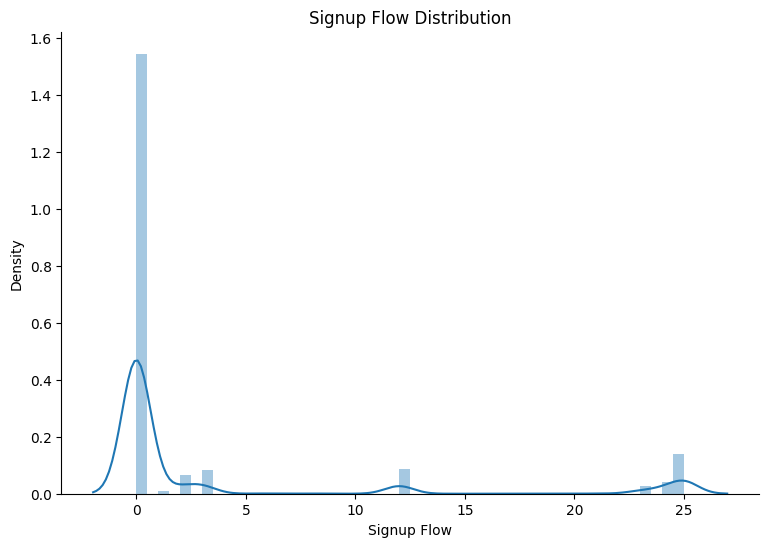

In [106]:
plt.figure(figsize=(9,6))
sns.distplot(x=user_data['signup_flow']);
plt.xlabel('Signup Flow')
plt.title('Signup Flow Distribution')
sns.despine();


> Notes:The signup_flow is a categorical column that is already encoded and hence we are unable to extract meaningful insights from the distribution.That said, the histogram shows that most of the records have a value of 0


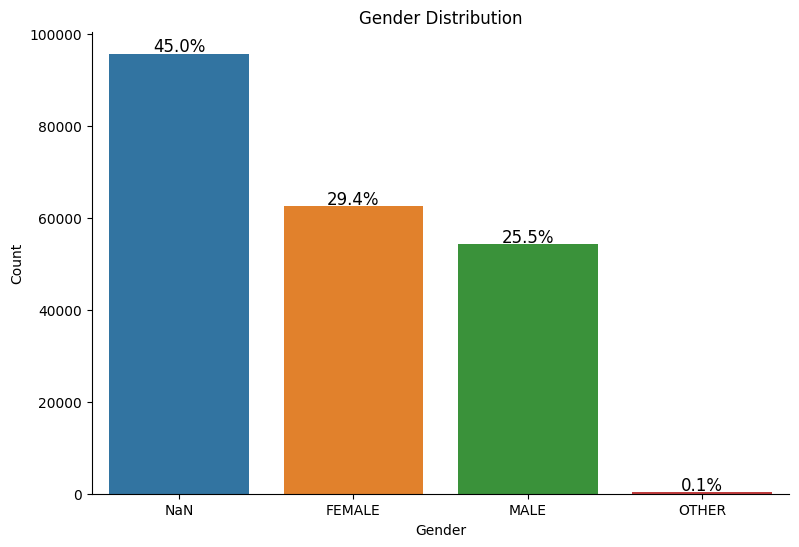

In [107]:
plt.figure(figsize=(9, 6))
counts = user_data['gender'].fillna('NaN').value_counts(dropna=False)
counts_order = counts.index

# Create the countplot
ax = sns.countplot(x=user_data['gender'].fillna('NaN'), order=counts_order)

# Add percentages above each bar
total = len(user_data)
for p in ax.patches:
    ax.annotate(f'{(p.get_height() / total) * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
sns.despine()



> Notes:The null value count is almost at 50%.The gender column has a slight imbalance since females are a little more frequent.


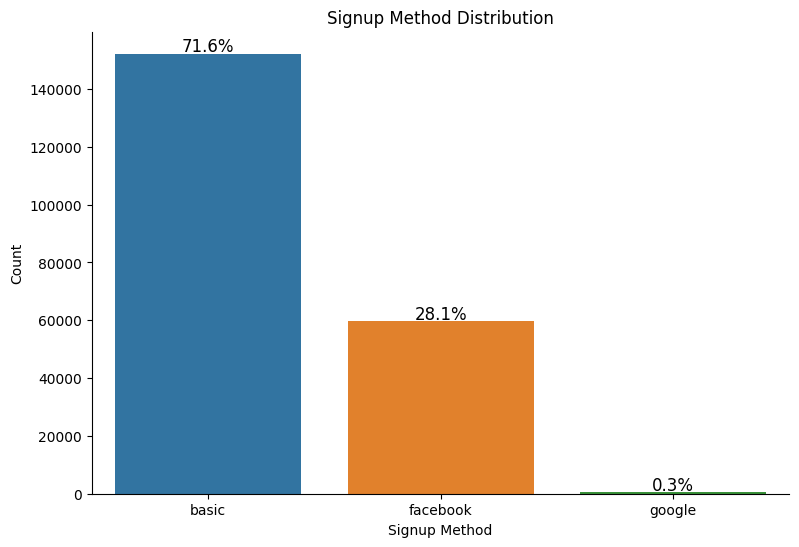

In [108]:
plt.figure(figsize=(9, 6))
counts = user_data['signup_method'].value_counts()
counts_order = counts.index

# Create the countplot
ax = sns.countplot(x=user_data['signup_method'], order=counts_order)

# Add percentages above each bar
total = len(user_data)
for p in ax.patches:
    ax.annotate(f'{(p.get_height() / total) * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Signup Method')
plt.ylabel('Count')
plt.title('Signup Method Distribution')
sns.despine()



> Notes:The majority of the members signed up through the basic method, which is expected, but the interesting insight is that more than 28.1% signed up through Facebook.


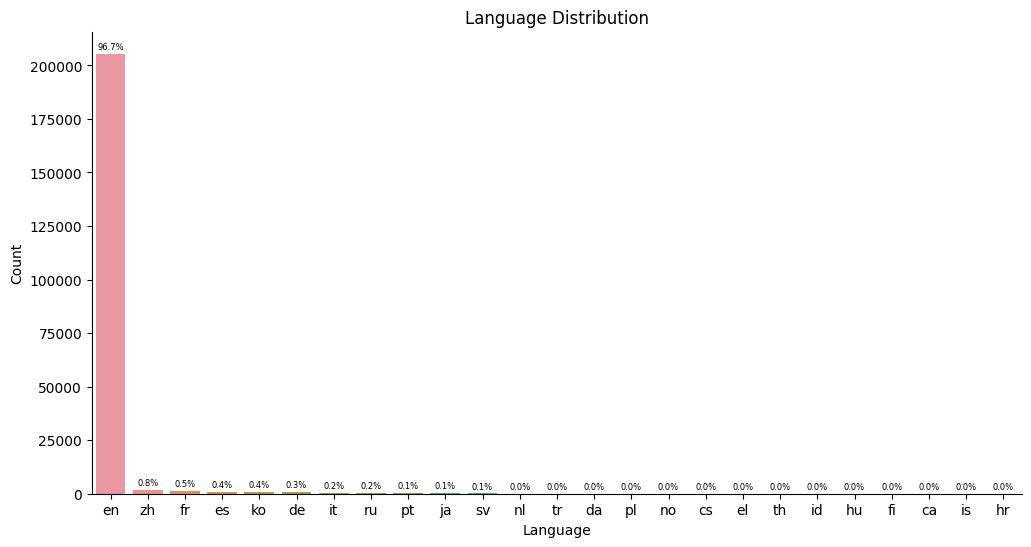

In [109]:
plt.figure(figsize=(12, 6))
counts = user_data['language'].value_counts()
counts_order = counts.index

# Create the countplot
ax = sns.countplot(x=user_data['language'], order=counts_order)

# Add percentages above each bar with smaller font
total = len(user_data)
for p in ax.patches:
    ax.annotate(f'{(p.get_height() / total) * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=6, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Distribution')
sns.despine()



> Notes:96.7% of the members speak English.


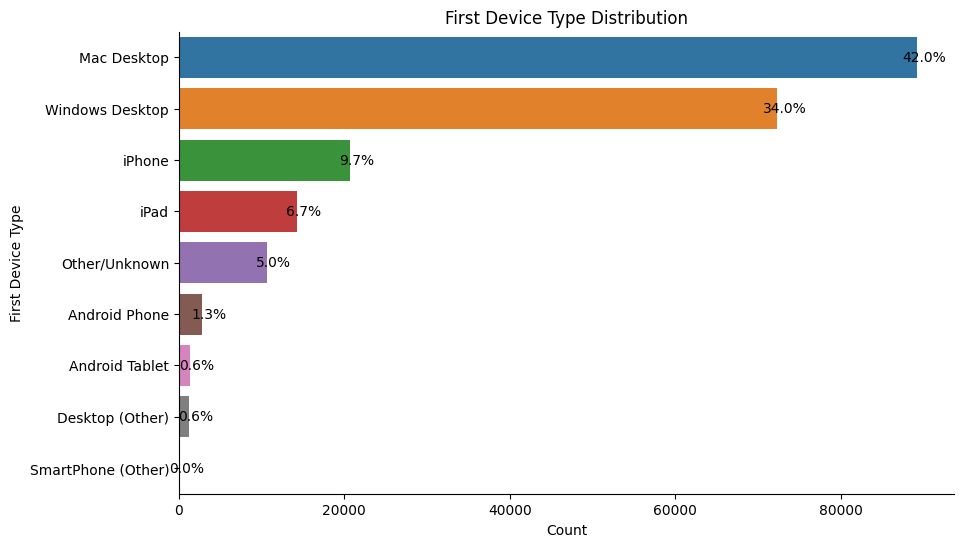

In [110]:
plt.figure(figsize=(10, 6))
counts = user_data['first_device_type'].value_counts()
counts_order = counts.index

# Create the countplot
ax = sns.countplot(data=user_data, y='first_device_type', order=counts_order)

# Add percentages to the bars with smaller font
total = len(user_data)
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (width, p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# Set labels and title
plt.ylabel('First Device Type')
plt.xlabel('Count')
plt.title('First Device Type Distribution')
sns.despine()



> Notes:The distribution shows that about 76% of the users used a Desktop computer for their first time visiting the Airbnb website.That may show that people prefer to be at home, when taking a decision to travel


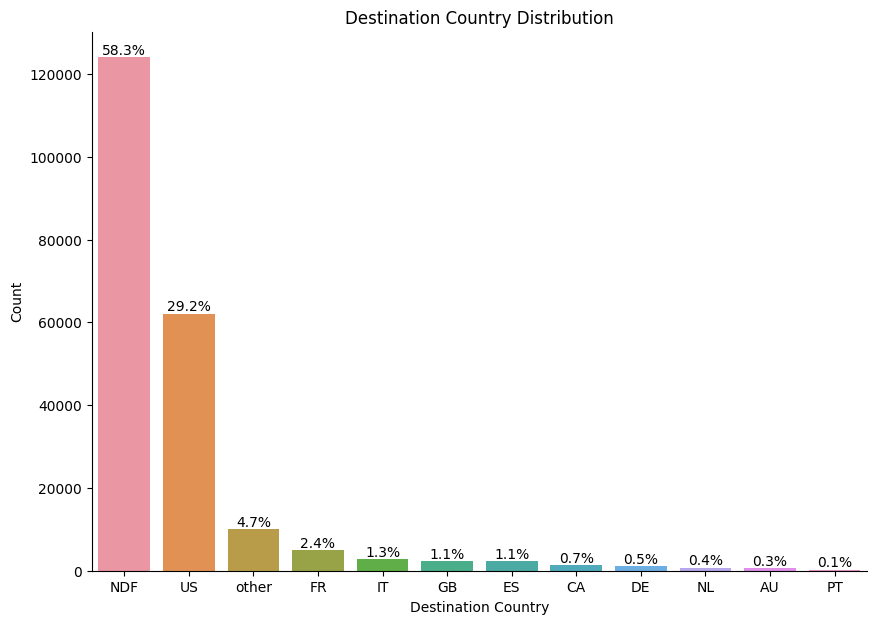

In [111]:
plt.figure(figsize=(10, 7))
counts = user_data['country_destination'].value_counts()
counts_order = counts.index

# Create the countplot
ax = sns.countplot(x=user_data['country_destination'], order=counts_order)

# Add percentages above each bar with smaller font
total = len(user_data)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.title('Destination Country Distribution')
sns.despine()


> Notes:The plot shows that almost 59% of the members who register end up not booking. While 29% book a flight to USA.
This column being the target column, it shows a huge imbalance between the 12 classes.

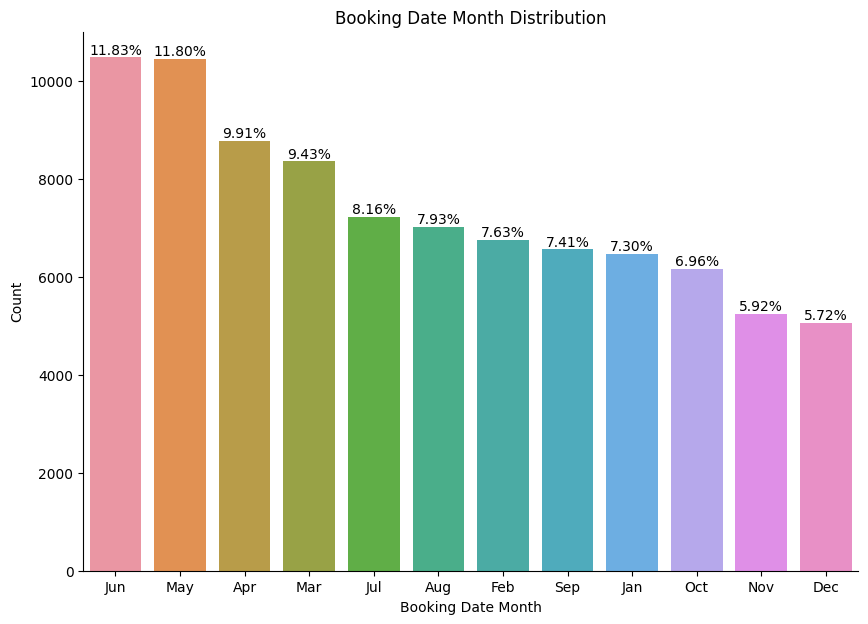

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming user_data is already defined and contains the 'date_first_booking' column
plt.figure(figsize=(10, 7))

# Get the month names from the 'date_first_booking' column
months_freq = user_data['date_first_booking'].dropna().dt.month_name().str[:3]

# Get the value counts of the months
counts = months_freq.value_counts()

# Get the order of months based on frequency
counts_order = counts.index

# Create the countplot
sns.countplot(x=months_freq, order=counts_order)

# Calculate the percentages for each bar and add them to the plot
total_count = counts.sum()
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    plt.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

# Labeling the plot
plt.xlabel('Booking Date Month')
plt.ylabel('Count')
plt.title('Booking Date Month Distribution')

# Clean up the plot's appearance
sns.despine()

# Show the plot
plt.show()



> Notes:We can see that the booking rates peak in June and May, and reach their lowest in November and December.That can be related to seasons. Where people prefer spring and summer to travel in contrary to winter and autumn.


## II.Bivariate Analysis

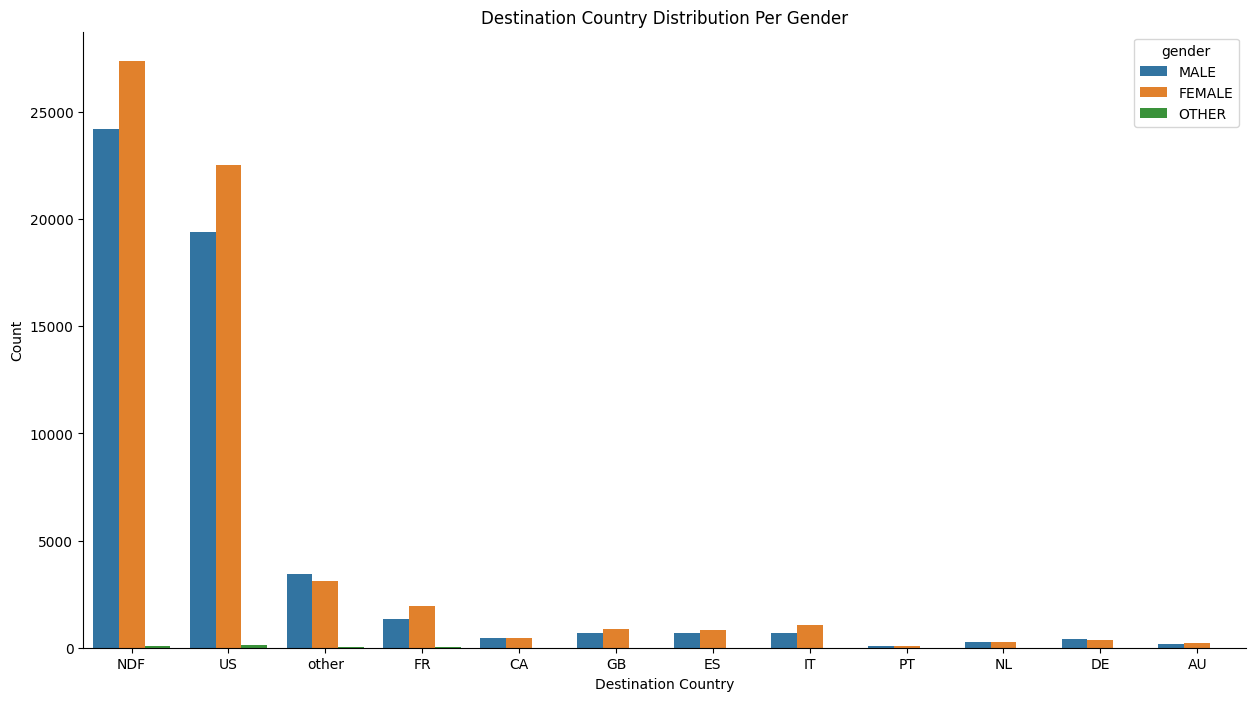

In [113]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train, x='country_destination', hue='gender');
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.title('Destination Country Distribution Per Gender')
sns.despine()

> Notes:
> We can see that countries such as Canada, Purtugal, Netherlands, Germany attract more male members than female And Female most of them ends with no booking or travel to US

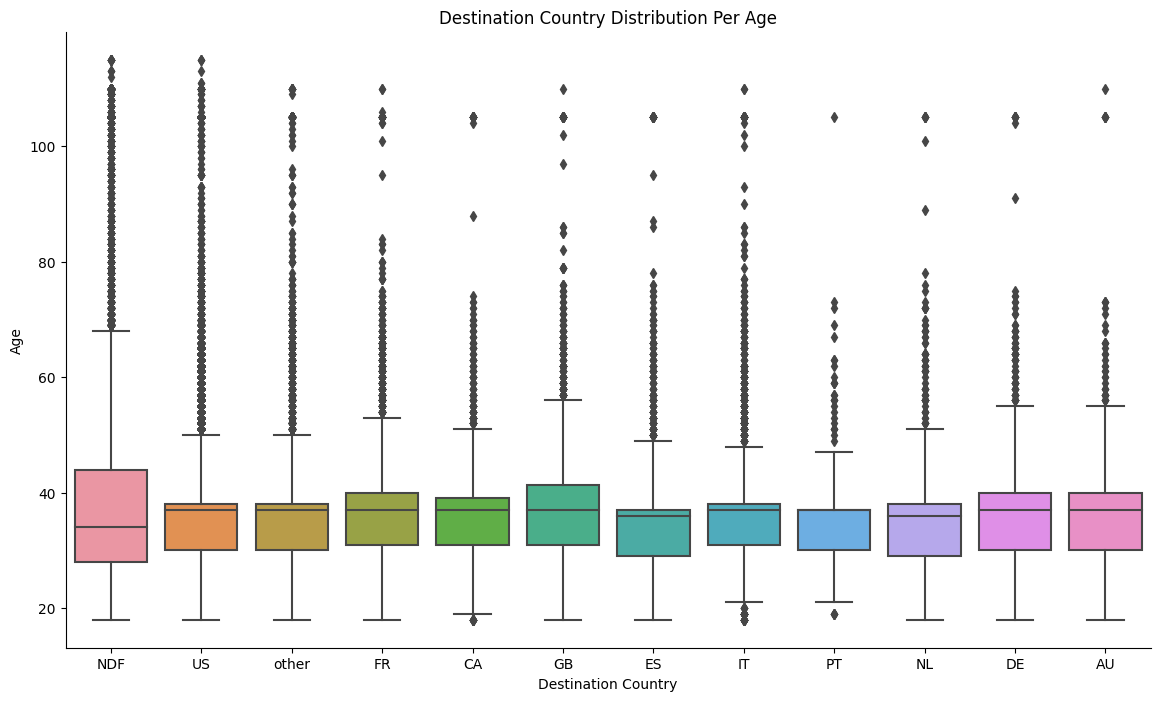

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14, 8))
sns.boxplot(data=df_train, y='age', x='country_destination', ax=ax)
plt.xlabel('Destination Country')
plt.ylabel('Age')
plt.title('Destination Country Distribution Per Age')
sns.despine();

> Notes :old people prefer US ,Italy,Fr 

4. # Modeling

In [115]:
# NDCG Score Functions
def dcg_score(y_true, y_score, k=5):
    """Discounted cumulative gain (DCG) at rank K."""
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

def ndcg_score_udf(ground_truth, predictions, k=5):
    """Normalized discounted cumulative gain (NDCG) at rank K."""
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1] + 1))
    T = lb.transform(ground_truth)

    scores = []
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

# Create the scorer for NDCG
ndcg_scorer = make_scorer(ndcg_score_udf, needs_proba=True, k=5)

In [116]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelBinarizer
import xgboost as xgb
from xgboost import XGBClassifier

# Split the data into training and testing sets
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Scale the data (not strictly necessary for Random Forest, but good practice)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_split)
x_test_scaled = scaler.transform(x_test_split)

# Initialize XGBoost Classifier
gb_model = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', learning_rate=0.1, 
                         max_depth=10, min_child_weight=0.5, n_estimators=150,random_state=42)

# Fit the model on the training data
gb_model.fit(x_train_scaled, y_train_split)

# Make predictions on training and test data
y_train_pred_prob = gb_model.predict_proba(x_train_scaled)
y_test_pred_prob = gb_model.predict_proba(x_test_scaled)

# Calculate NDCG Score for Training Data
train_ndcg_score = ndcg_score_udf(y_train_split, y_train_pred_prob)
print(f"NDCG Training Score: {train_ndcg_score * 100:.4f}%")

# Calculate NDCG Score for Test Data
test_ndcg_score = ndcg_score_udf(y_test_split, y_test_pred_prob)
print(f"NDCG Test Score: {test_ndcg_score * 100:.4f}%")

# Feature Importance (Optional: if you want to analyze feature importance)
feat_importance = gb_model.feature_importances_
sorted_indices = np.argsort(feat_importance)
print(f"Feature Importance: {feat_importance[sorted_indices]}")

NDCG Training Score: 87.0541%
NDCG Test Score: 82.8029%
Feature Importance: [0.         0.         0.         0.         0.         0.
 0.         0.         0.00127232 0.00259525 0.00427151 0.00475635
 0.00495831 0.00498226 0.0049966  0.005193   0.00564611 0.00592853
 0.00604643 0.0061421  0.0061664  0.0063301  0.00637626 0.00645136
 0.00646297 0.00663752 0.00674757 0.00685604 0.00703709 0.00721918
 0.00737104 0.00747967 0.00811891 0.00844716 0.0088068  0.00901516
 0.00919102 0.00921958 0.00924409 0.00924957 0.00930059 0.00933485
 0.00934893 0.00944396 0.00981871 0.00995533 0.01005692 0.01011179
 0.01015694 0.01029417 0.01057475 0.01061549 0.01066233 0.01069914
 0.0107816  0.01094382 0.01118544 0.01122731 0.01123872 0.01126488
 0.0113364  0.0113866  0.01202311 0.01262177 0.01289382 0.01299611
 0.01350036 0.01392582 0.01482471 0.01529251 0.01535187 0.01538363
 0.01591723 0.01603671 0.0171742  0.01773686 0.01893334 0.01963171
 0.02160838 0.0924502  0.09587786 0.10686488]


In [117]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle  # For saving the model
from sklearn.preprocessing import LabelBinarizer
import joblib

# Split the data into training and testing sets
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Scale the data (not strictly necessary for Random Forest, but good practice)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_split)
x_test_scaled = scaler.transform(x_test_split)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=150,  # Number of trees in the forest
    max_depth=15,      # Maximum depth of the tree
    random_state=42,   # Seed for reproducibility
)

# Train the Random Forest model
rf_model.fit(x_train_scaled, y_train_split)

# Make predictions
y_train_pred_prob = rf_model.predict_proba(x_train_scaled)
y_test_pred_prob = rf_model.predict_proba(x_test_scaled)

# Calculate NDCG Score for Training Data
train_ndcg_score = ndcg_score_udf(y_train_split, y_train_pred_prob)
print(f"NDCG Training Score: {train_ndcg_score * 100:.4f}%")

# Calculate NDCG Score for Test Data
test_ndcg_score = ndcg_score_udf(y_test_split, y_test_pred_prob)
print(f"NDCG Test Score: {test_ndcg_score * 100:.4f}%")

# Feature Importance (Optional: if you want to analyze feature importance)
feat_importance = rf_model.feature_importances_
sorted_indices = np.argsort(feat_importance)
print(f"Feature Importance: {feat_importance[sorted_indices]}")

# Save the trained model and scaler
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully in .pkl format.")

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.joblib') 

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully in .joblib format.")

NDCG Training Score: 84.8511%
NDCG Test Score: 82.8519%
Feature Importance: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.80574729e-07 8.31552356e-07 1.61836491e-06 8.60811012e-06
 1.64822518e-05 2.33689687e-05 3.18801650e-05 5.36702592e-05
 5.92791551e-05 7.19766859e-05 7.41587671e-05 8.37425744e-05
 8.91507680e-05 9.78165498e-05 1.06975622e-04 1.08300403e-04
 1.16966035e-04 1.23452321e-04 1.41417355e-04 1.58081308e-04
 1.59578302e-04 1.87463801e-04 1.94346772e-04 2.58844447e-04
 2.63087545e-04 2.68130109e-04 2.88421167e-04 3.24917383e-04
 4.06253144e-04 4.45759788e-04 5.48358582e-04 7.08193546e-04
 7.22358292e-04 7.29863693e-04 7.45960187e-04 8.13751261e-04
 9.29645136e-04 9.85899104e-04 1.04351382e-03 1.08177217e-03
 1.12721301e-03 1.14016920e-03 1.23954229e-03 1.35548183e-03
 1.96434481e-03 2.14944289e-03 2.26333265e-03 2.51587966e-03
 2.68360806e-03 2.72257979e-03 2.75965615e-03 3.04959471e-03
 3.07407289e-03 3.24931250e-03 3.95447247e-03 4.03609517e-03
 4.147038

In [120]:
with open('random_forest_model.pkl', 'rb') as model_file:
    rf_model = pickle.load(model_file)

# Example of new customer data
new_data = pd.DataFrame({
    'age': [35],  # Numeric feature
    'signup_flow': [0],  # Numeric feature
    'date_account_created_year': [2022],  # Numeric feature
    'date_account_created_month': [5],  # Numeric feature
    'date_account_created_day': [15],  # Numeric feature
    'timestamp_first_active_year': [2022],  # Numeric feature
    'timestamp_first_active_month': [5],  # Numeric feature
    'timestamp_first_active_day': [15],  # Numeric feature
    'secs_elapsed': [3000],  # Numeric feature
    'action_count': [5],  # Numeric feature
    'gender': ['MALE'],  # Categorical feature
    'signup_method': ['facebook'],  # Categorical feature
    'language': ['en'],  # Categorical feature
    'affiliate_channel': ['seo'],  # Categorical feature
    'affiliate_provider': ['google'],  # Categorical feature
    'first_affiliate_tracked': ['untracked'],  # Categorical feature
    'signup_app': ['Web'],  # Categorical feature
    'first_device_type': ['Mac Desktop'],  # Categorical feature
    'first_browser': ['Desktop Browsers']  # Categorical feature
})

# Step 1: One-Hot Encode the Categorical Features of the New Data using pd.get_dummies
new_data_encoded = pd.get_dummies(new_data, columns=cat_cols, drop_first=True)

# Step 2: Align new_data_encoded columns with x_train_encoded columns
new_data_encoded = new_data_encoded.reindex(columns=x_train.columns, fill_value=0)

# Step 3: Apply the same scaling to the new data (use the same scaler used during training)
new_data_scaled = scaler.transform(new_data_encoded)

# Step 4: Make Predictions using the trained modelf
predictions = rf_model.predict(new_data_scaled)

# Step 5: Decode the predicted result back to the original country labels
predicted_country = encoder.inverse_transform(predictions)

# Output the predicted country
print(f"Predicted Country Destination: {predicted_country[0]}")

Predicted Country Destination: US


In [121]:
print(x_train.columns)

Index(['age', 'signup_flow', 'date_account_created_year',
       'date_account_created_month', 'date_account_created_day',
       'timestamp_first_active_year', 'timestamp_first_active_month',
       'timestamp_first_active_day', 'secs_elapsed', 'action_count',
       'gender_MALE', 'gender_OTHER', 'signup_method_facebook',
       'signup_method_google', 'language_cs', 'language_da', 'language_de',
       'language_el', 'language_en', 'language_es', 'language_fi',
       'language_fr', 'language_hr', 'language_hu', 'language_id',
       'language_is', 'language_it', 'language_ja', 'language_ko',
       'language_nl', 'language_no', 'language_pl', 'language_pt',
       'language_ru', 'language_sv', 'language_th', 'language_tr',
       'language_zh', 'affiliate_channel_content', 'affiliate_channel_direct',
       'affiliate_channel_other', 'affiliate_channel_remarketing',
       'affiliate_channel_sem-brand', 'affiliate_channel_sem-non-brand',
       'affiliate_channel_seo', 'affiliate_p

In [124]:
# Save the feature columns used during model training
merged_train.signup_flow.value_counts()

signup_flow
0     114559
3       7183
12      6689
25      6650
2       5480
24      2042
23      1143
1        555
6        210
21       195
8        168
5         31
16        11
20         5
15         4
10         1
4          1
Name: count, dtype: int64

In [125]:
x_train.to_csv('x_train.csv', index=False) 

In [135]:
for i in [0,1,2,3,4,5,6,7,8,9,10,11]:
    predicted_country = encoder.inverse_transform([i])
    print(predicted_country)

['AU']
['CA']
['DE']
['ES']
['FR']
['GB']
['IT']
['NDF']
['NL']
['PT']
['US']
['other']
